In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE


Preparação dos dados

In [33]:
base_census = pd.read_csv("census.csv")
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
income_infos = np.unique(base_census['income'], return_counts=True)
income_infos

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

Diferença na quantidade de registros: 16879


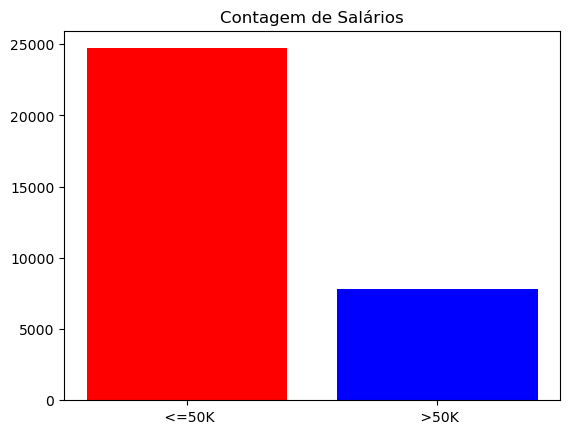

In [35]:
plt.title("Contagem de Salários")
plt.bar(x=income_infos[0], height=income_infos[1],color=['red','blue'])
print('Diferença na quantidade de registros:', income_infos[1][0] - income_infos[1][1])

In [36]:
### Atributos Previsores
X_census = base_census.iloc[:,0:14]
X_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [37]:
### Classes
y_census = base_census.iloc[:, 14]
y_census

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [38]:
### Transformando em numpy arrays
X_census = X_census.values
y_census = y_census.values

X_census, y_census

(array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
        [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
        [38, ' Private', 215646, ..., 0, 40, ' United-States'],
        ...,
        [58, ' Private', 151910, ..., 0, 40, ' United-States'],
        [22, ' Private', 201490, ..., 0, 20, ' United-States'],
        [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
       dtype=object),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

Inspecionando as colunas do dataframe, vemos que para deixar apenas atributos categóricos para o Label Encoder

In [39]:
encoder_workclass = LabelEncoder()
encoder_education = LabelEncoder()
encoder_marital= LabelEncoder()
encoder_occupation = LabelEncoder()
encoder_relationship = LabelEncoder()
encoder_race = LabelEncoder()
encoder_sex = LabelEncoder()
encoder_country = LabelEncoder()

In [40]:
X_census[:,1] = encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = encoder_country.fit_transform(X_census[:,13])


<h3> Subamostragem com Tomek Links - imblearn.under <h3\>  



Toolbox for imbalanced dataset in machine learning.

imbalanced-learn is a set of python methods to deal with imbalanced datset in machine learning and pattern recognition.

In [41]:
### Atuará na classes <=50K e > 50K
tomek_links = TomekLinks(sampling_strategy='all')
X_under, y_under = tomek_links.fit_resample(X_census, y_census)

In [42]:
X_under.shape, y_under.shape, X_census.shape

((27763, 14), (27763,), (32561, 14))

Isso significa que o algoritmo apagou em torno de 2 mil registros da base de dados.

In [43]:
print('Base original', np.unique(y_census, return_counts=True))
print('Base após algoritmo com remoção de registros minoritários',np.unique(y_under, return_counts=True))
# 24720 -> 22321

Base original (array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))
Base após algoritmo com remoção de registros minoritários (array([' <=50K', ' >50K'], dtype=object), array([22321,  5442], dtype=int64))


<h2> One Hot Encoder <h2\>  



In [44]:
transformers: list[tuple] = [("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])]

OHE = ColumnTransformer(transformers=transformers, remainder="passthrough")
X_census = OHE.fit_transform(X_under).toarray()
X_census.shape, X_under.shape

((27763, 108), (27763, 14))

In [45]:
### Divisão da Base de dados

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_train_under.shape, X_test_under.shape

((23598, 14), (4165, 14))

In [46]:
from sklearn.ensemble import RandomForestClassifier

### Tinha obitdo 84.7% com dados desbalanceados

rf_clf = RandomForestClassifier(
    criterion='entropy',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100
)

rf_clf.fit(X_train_under, y_train_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [47]:
y_pred = rf_clf.predict(X_test_under)
accuracy_score(y_true=y_test_under, y_pred=y_pred)

0.9020408163265307

Com a técnica do TOMEK LINKS saímos de 84.7% para 90%.

In [49]:
print(classification_report(y_true=y_test_under, y_pred=y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.97      0.94      3347
        >50K       0.82      0.64      0.72       818

    accuracy                           0.90      4165
   macro avg       0.87      0.80      0.83      4165
weighted avg       0.90      0.90      0.90      4165



Esse algoritmo, apesar de aumentar o valor do _accuracy_ para 90%, não conseguiu aumentar o recall da classe >=50.